## Do the imports

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

## Import and view the data

In [37]:
data = pd.read_excel("twitter.xlsx")

In [38]:
data.head()

,Column1.created_at,Date,Time,Column1.text,Own or Retweet?,Column1.truncated,Column1.metadata,Column1.source,Source,Column1.is_quote_status,Column1.retweet_count,Column1.favorite_count,Column1.lang
0,Wed Dec 01 08:10:06,2001-12-01,08:10:06,"RT @IGN: In this new trailer, Master Chief car...",Retweet,False,[Record],"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App,False,246,0,en
1,Wed Dec 01 08:09:59,2001-12-01,08:09:59,RT @Woodkid: Thank you @HIDEO_KOJIMA_EN ! http...,Retweet,False,[Record],"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App,False,273,0,en
2,Wed Dec 01 08:09:47,2001-12-01,08:09:47,RT @DannyBoi_2077: Truck ran out of juice.. so...,Retweet,False,[Record],"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App,False,16,0,en
3,Wed Dec 01 05:05:35,2001-12-01,05:05:35,RT @DannyBoi_2077: My reaction when the day DS...,Retweet,False,[Record],"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App,False,17,0,en
4,Wed Dec 01 03:38:59,2001-12-01,03:38:59,"RT @RetroNewsNow: 🎄On November 30, 1977, durin...",Retweet,False,[Record],"<a href=""http://twitter.com/download/iphone"" r...",iPhone,False,314,0,en


## Subset the columns for analysis

In [39]:
data1 = data[["Column1.text", "Own or Retweet?", "Column1.retweet_count"]]

In [40]:
data1.head()

,Column1.text,Own or Retweet?,Column1.retweet_count
0,"RT @IGN: In this new trailer, Master Chief car...",Retweet,246
1,RT @Woodkid: Thank you @HIDEO_KOJIMA_EN ! http...,Retweet,273
2,RT @DannyBoi_2077: Truck ran out of juice.. so...,Retweet,16
3,RT @DannyBoi_2077: My reaction when the day DS...,Retweet,17
4,"RT @RetroNewsNow: 🎄On November 30, 1977, durin...",Retweet,314


In [41]:
data1["Tweet Length"] = data1["Column1.text"].map(len)

C:\Users\romat\AppData\Local\Temp/ipykernel_8156/1947008203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Tweet Length"] = data1["Column1.text"].map(len)


In [42]:
data1["Retweet"] = pd.get_dummies(data1["Own or Retweet?"])["Retweet "]
data1 = data1.drop(["Own or Retweet?", "Column1.text"], axis = 1)

C:\Users\romat\AppData\Local\Temp/ipykernel_8156/3795821963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Retweet"] = pd.get_dummies(data1["Own or Retweet?"])["Retweet "]


In [43]:
data1["retweet_normalized"] = data1["Column1.retweet_count"].apply(lambda x: np.log(x))
data1["length_normalized"] = data1["Tweet Length"].apply(lambda x: np.log(x))

## Split data into train and test

In [44]:
x = data1[["Column1.retweet_count", "Tweet Length"]]
y = data1["Retweet"]
x_normalized = data1[["retweet_normalized", "length_normalized"]]
#y = a + bX + e

In [45]:
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)

In [46]:
normalized_x_train, normalized_x_test, ny_train, ny_test= train_test_split(x_normalized, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)

## Instantiate and fit the classifier

In [47]:
knn=KNeighborsClassifier()

In [48]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
## View the score in automatic and manual way
print(knn.score(x_test,y_test))

0.6


In [50]:
pred = knn.predict(x_test)
check = x_test[:]
check["prediction"] = pred
check = check.sort_index()
a = list(check.index.values)
check["real"] = data1.iloc[a, :]["Retweet"]

C:\Users\romat\AppData\Local\Temp/ipykernel_8156/418478617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["prediction"] = pred


In [51]:
print(check)
(12/20)

    Column1.retweet_count  Tweet Length  prediction  real
2                      16           137           1     1
7                      87            33           1     0
8                     433           140           1     1
13                     14           140           1     1
16                     73           106           1     1
22                    759            57           0     0
24                      5            77           1     0
26                     14           140           1     0
30                    253            98           1     0
33                     94           140           1     1
53                    161           135           1     1
54                     31            51           0     0
55                     61           114           0     1
73                    171            83           0     1
75                     18           140           1     0
78                    289           140           1     1
86            

0.6

## Classify an abstract tweet

In [58]:
knn.predict([[1000, 10]])

C:\Users\romat\miniconda3\envs\data\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=uint8)

## Fit the normalized classifier

In [59]:
knn=KNeighborsClassifier()
knn.fit(normalized_x_train,y_train)
print(knn.score(normalized_x_test,y_test))

0.65


## Viewing the data

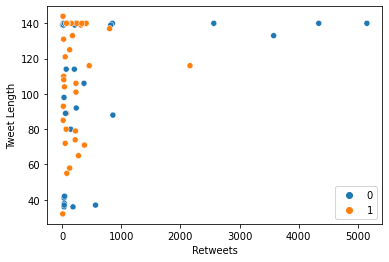

In [60]:
sns.scatterplot(data = pd.DataFrame(np.c_[x_train, y_train]), x = 0, y = 1, hue = 2)
plt.xlabel('Retweets')
plt.ylabel("Tweet Length")
plt.legend().get_texts()[0].set_text("0")

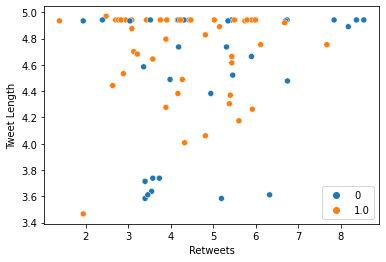

In [61]:
sns.scatterplot(data = pd.DataFrame(np.c_[normalized_x_train, ny_train]), x = 0, y = 1, hue = 2)
plt.xlabel('Retweets')
plt.ylabel("Tweet Length")
plt.legend().get_texts()[0].set_text("0")

## Let's play with the K

In [62]:
knn=KNeighborsClassifier(3)
knn.fit(normalized_x_train,ny_train)
print(knn.score(normalized_x_test, ny_test))

0.55


In [63]:
knn=KNeighborsClassifier(7)
knn.fit(normalized_x_train,ny_train)
print(knn.score(normalized_x_test, ny_test))

0.7


In [64]:
knn=KNeighborsClassifier(9)
knn.fit(normalized_x_train,ny_train)
print(knn.score(normalized_x_test, ny_test))

0.75


In [65]:
knn=KNeighborsClassifier(11)
knn.fit(normalized_x_train,ny_train)
print(knn.score(normalized_x_test, ny_test))

0.7


In [66]:
knn=KNeighborsClassifier(15)
knn.fit(normalized_x_train,ny_train)
print(knn.score(normalized_x_test, ny_test))

0.7


In [67]:
knn=KNeighborsClassifier(19)
knn.fit(normalized_x_train,ny_train)
print(knn.score(normalized_x_test, ny_test))

0.65


# Let's use the best K and change the train/split

In [68]:
normalized_x_train, normalized_x_test, ny_train, ny_test= train_test_split(x_normalized, y,
                                                   test_size= 0.05,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
knn=KNeighborsClassifier(7)
knn.fit(normalized_x_train,ny_train)
print('7 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))
knn=KNeighborsClassifier(9)
knn.fit(normalized_x_train,ny_train)
print('9 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))
knn=KNeighborsClassifier(11)
knn.fit(normalized_x_train,ny_train)
print('11 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))

7 neighbours: 0.6
9 neighbours: 0.6
11 neighbours: 0.6


In [69]:
normalized_x_train, normalized_x_test, ny_train, ny_test= train_test_split(x_normalized, y,
                                                   test_size= 0.3,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
knn=KNeighborsClassifier(7)
knn.fit(normalized_x_train,ny_train)
print('7 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))
knn=KNeighborsClassifier(9)
knn.fit(normalized_x_train,ny_train)
print('9 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))
knn=KNeighborsClassifier(11)
knn.fit(normalized_x_train,ny_train)
print('11 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))

7 neighbours: 0.6666666666666666
9 neighbours: 0.6666666666666666
11 neighbours: 0.6333333333333333


In [70]:
normalized_x_train, normalized_x_test, ny_train, ny_test= train_test_split(x_normalized, y,
                                                   test_size= 0.15,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
knn=KNeighborsClassifier(7)
knn.fit(normalized_x_train,ny_train)
print('7 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))
knn=KNeighborsClassifier(9)
knn.fit(normalized_x_train,ny_train)
print('9 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))
knn=KNeighborsClassifier(11)
knn.fit(normalized_x_train,ny_train)
print('11 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))

7 neighbours: 0.7333333333333333
9 neighbours: 0.8
11 neighbours: 0.8


## K-Fold

In [71]:
from sklearn.model_selection import KFold

In [72]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [73]:
x_normalized

,retweet_normalized,length_normalized
0,5.505332,4.941642
1,5.609472,4.174387
2,2.772589,4.919981
3,2.833213,4.941642
4,5.749393,4.934474
...,...,...
95,5.081404,4.615121
96,4.317488,4.941642
97,4.174387,4.382027
98,2.833213,4.941642


In [74]:
kf.get_n_splits(x_normalized)

5

In [89]:
knn_scores = np.empty(0)
for train_index, test_index in kf.split(x_normalized):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = x_normalized.iloc[train_index], x_normalized.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  knn=KNeighborsClassifier(9)
  knn.fit(X_train, y_train)
  print(str(knn.score(X_test, y_test)))
  knn_scores = np.append(knn_scores, knn.score(X_test, y_test))
  np.mean(knn_scores)

TRAIN: [ 0  1  3  4  5  6  9 10 11 12 14 15 17 18 19 20 21 23 25 27 28 29 31 32
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 74 76 77 79 80 81 82 83 84 85 87 88
 89 90 91 94 96 97 98 99] TEST: [ 2  7  8 13 16 22 24 26 30 33 53 54 55 73 75 78 86 92 93 95]
0.75
TRAIN: [ 0  1  2  4  5  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 46 47 49 50 52 53 54 55
 57 58 59 61 64 65 66 67 69 70 72 73 75 77 78 79 81 83 84 85 86 87 88 89
 91 92 93 94 95 96 97 98] TEST: [ 3  6 18 27 43 45 48 51 56 60 62 63 68 71 74 76 80 82 90 99]
0.55
TRAIN: [ 2  3  6  7  8  9 10 12 13 14 16 18 19 20 21 22 24 25 26 27 29 30 31 32
 33 36 37 39 43 44 45 46 47 48 49 51 53 54 55 56 57 58 60 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
 92 93 94 95 96 97 98 99] TEST: [ 0  1  4  5 11 15 17 23 28 34 35 38 40 41 42 50 52 59 61 91]
0.8
TRAIN: [ 0  1  2  3  4  5 

In [90]:
np.mean(knn_scores)

0.7